In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import random

### Setup

In [26]:
def p(x):
    return np.exp(1/2 * (-x**2)) * (np.sin(x)**2 + (3*np.cos(x)**2)*(np.sin(7*x)**2) + 1)

def f(x):
    return x**2

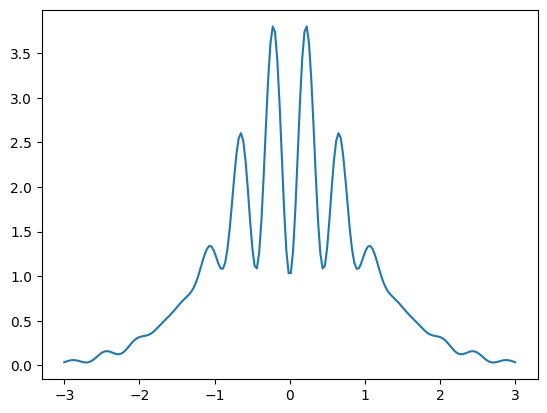

In [187]:
samples = np.linspace(-3, 3, 200)
plt.plot(samples, [p(x) for x in samples])

### Task 1

In [8]:
def rejection_sampling(p, q, n, plot = True):
    samples = np.linspace(-3, 3, n)
    q_xs = np.array([q(x) for x in samples])
    p_xs = np.array([p(x) for x in samples])

    k = max(p_xs / q_xs)
    print(f'k is found at: {k}')
    
    #Scale
    q_xs = q_xs * k


    if plot:
        fig = plt.figure(figsize = (12, 8))
        #samples_y = 
        samples_y = np.random.uniform(0, k, n)

        sns.lineplot(x = samples, y = p_xs, label = 'p(x)')
        sns.lineplot(x = samples, y = q_xs, label = 'q(x)')
        
        successes, fails = [], []
        for i in range(len(samples)):
            if samples_y[i] <= p(samples[i]):
                successes.append((samples[i], samples_y[i]))
            else:
                fails.append((samples[i], samples_y[i]))
        

        sns.scatterplot(x = np.array(successes)[:, 0], y = np.array(successes)[:, 1],  label = 'success', color = 'green')
        sns.scatterplot(x = np.array(fails)[:, 0], y = np.array(fails)[:, 1],  label = 'fails', color = 'red')
        plt.show()
        

        #Can also draw cdf to compare
        fig = plt.figure(figsize = (12, 8))
        sns.ecdfplot(p_xs, label = 'p(x)')
        sns.ecdfplot(np.array(successes)[:, 1], label = 'simulation')
        plt.legend()
        plt.show()

    return 1

k is found at: 3.809025378712061


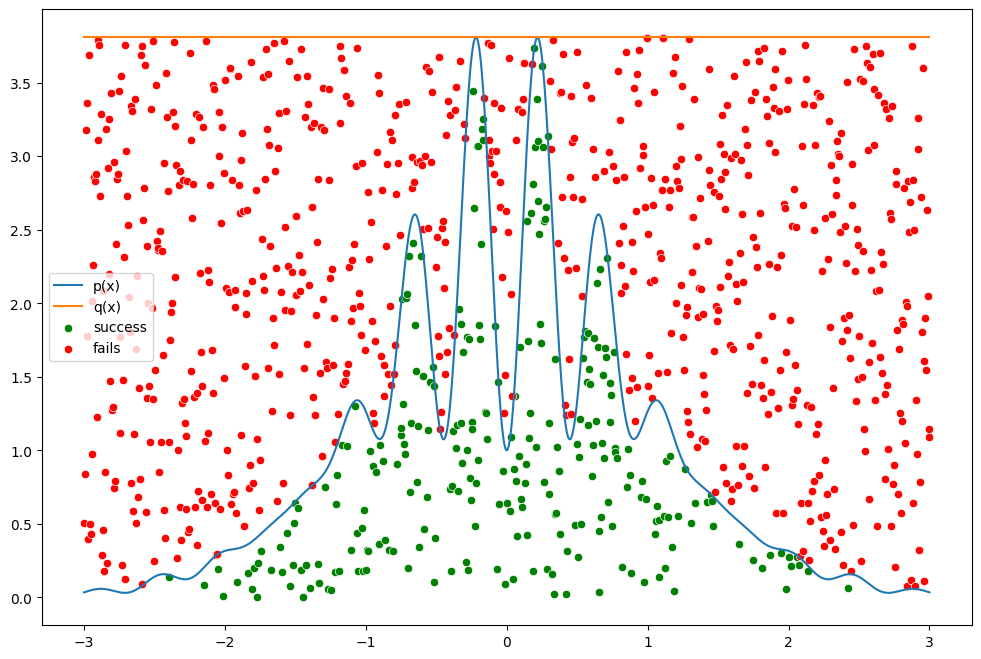

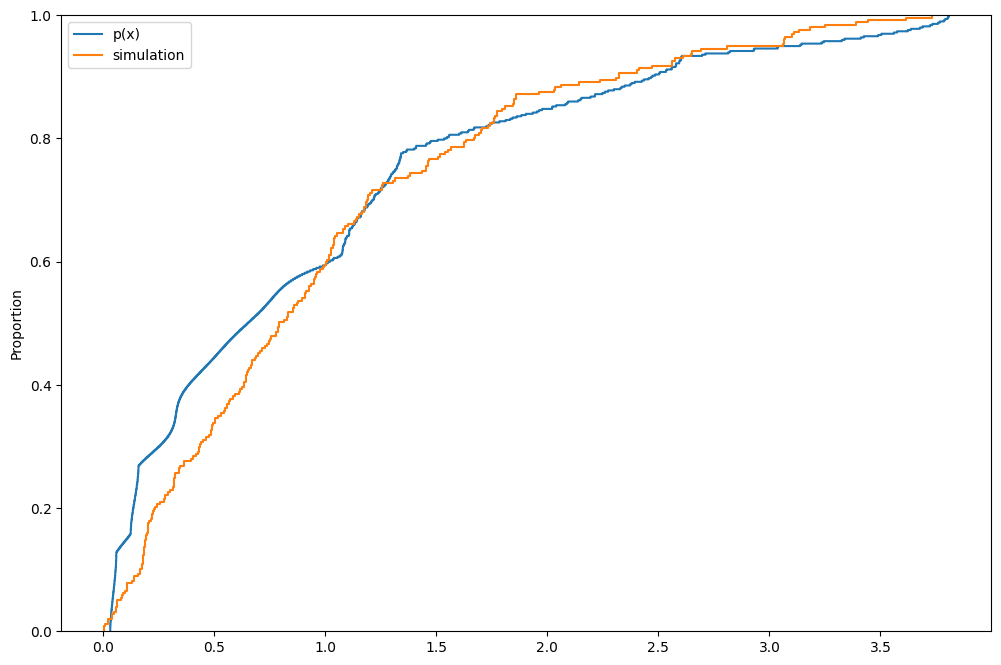

1

In [9]:
def q_uniform(n):
    return 1

rejection_sampling(p, q_uniform, 1000)

In [135]:
#Just making the sample function by itself
def sample_uniform(p, q, f, n, plot = True):
    samples = np.linspace(-3, 3, n)
    q_xs = np.array([q(x) for x in samples])
    p_xs = np.array([p(x) for x in samples])
    k = max(p_xs / q_xs)

    zs = np.random.uniform(-3, 3, size = n)
    u = np.random.uniform(0, 1, size = n)
    successes = zs[u < p(zs) / (k * q(zs))]
    
    if plot: 
        sns.displot(successes, bins = 20)
    return f(successes)


array([2.83035971, 2.8888337 , 0.64807131, ..., 0.05400556, 1.20320377,
       0.02616384])

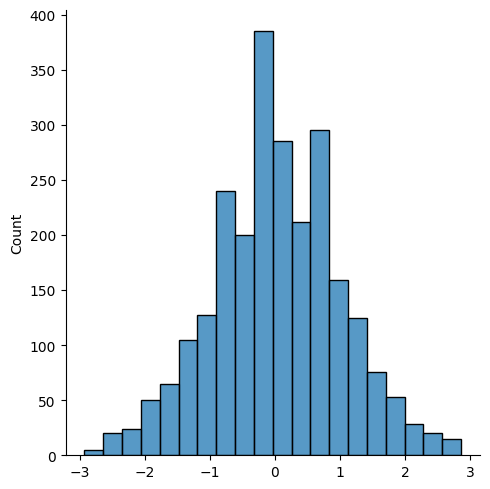

In [136]:
sample_uniform(p, q_uniform, f, 10000)

### Task 2

In [129]:
def q_gaussian(x):
    return scipy.stats.norm.pdf(x)

In [130]:
def rejection_sampling_gaussian (p, q, n, plot = True):
    samples = np.linspace(-3, 3, n)
    q_xs = np.array([q(x) for x in samples])
    p_xs = np.array([p(x) for x in samples])

    k = max(p_xs / q_xs)
    print(f'k is found at: {k}')

    if plot:
        fig, axs  = plt.subplots(2)#(figsize = (8,6), title = 'Original plot')
        sns.lineplot(x = samples, y = p_xs, label = 'p(x)', ax = axs[0])
        sns.lineplot(x = samples, y = q_xs, label = 'q(x)', ax = axs[0])
        axs[0].set_title('Unscaled')

        sns.lineplot(x = samples, y = p_xs, label = 'p(x)', ax = axs[1])
        sns.lineplot(x = samples, y = k*q_xs, label = 'k*q(x)', ax = axs[1])
        axs[0].set_title('Scaled')
        plt.show()

    zs = np.random.normal(0, 1, size = n)
    u = np.random.uniform(0, 1, size = n)
    successes = zs[u < p(zs) / (k * q(zs))]
    
    sns.displot(successes)

    return f(successes)

k is found at: 9.781607745778901


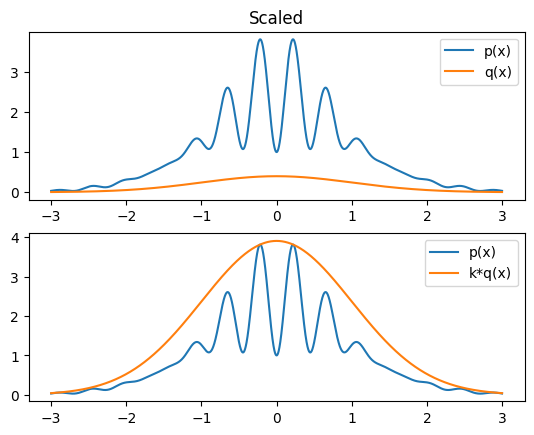

array([ 1.25718927, 10.85806243,  0.33294451, ...,  0.05370385,
        2.6734092 ,  0.24660482])

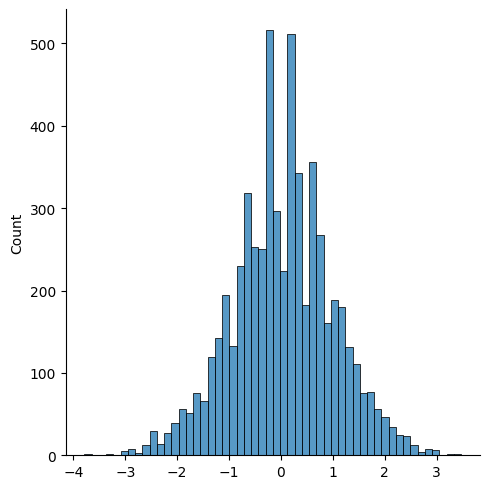

In [131]:
def q_gaussian(x):
    return scipy.stats.norm.pdf(x)
rejection_sampling_gaussian(p, q_gaussian, 10000)

In [137]:
def sample_normal(p, q, f, n, plot = True):
    samples = np.linspace(-3, 3, n)
    q_xs = np.array([q(x) for x in samples])
    p_xs = np.array([p(x) for x in samples])
    k = max(p_xs / q_xs)

    zs = np.random.normal(0, 1, size = n)
    u = np.random.uniform(0, 1, size = n)
    successes = zs[u < p(zs) / (k * q(zs))]
    
    if plot:
        sns.displot(successes, bins = 20)
    return f(successes)

array([2.55671967, 0.19283704, 0.02469562, ..., 0.36533234, 3.0358211 ,
       0.03806339])

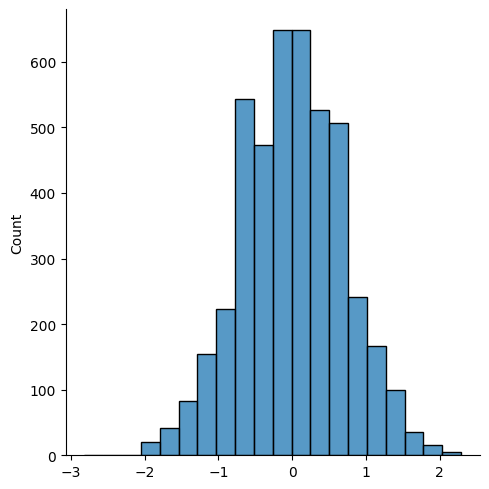

In [138]:
sample_normal(p, q_uniform, f, 10000)

### Task 3

In [146]:
q_second_gaussian = scipy.stats.norm(loc = 0, scale = 1)

In [174]:
def importance_sampling_gaussian(p, q, f, n):
    zs = q.rvs(size = n)

    #unnormalized mu
    mu = np.sum((p(zs) / q.pdf(zs)) * f(zs)) / n
    #print(f'Unnormalized mu: {mu}')

    ratio = np.sum(p(zs) / q.pdf(zs)) / n
    #print(ratio)
    normalized_mu = mu * (1/ ratio)
    #print(f'Normalized mu: {normalized_mu}')

    #sample from approx
    out = f(zs) * (p(zs)/q.pdf(zs)) /ratio
    
    #print(f'Mean from sample: {np.mean(out)}')
    #print(f'Variance from sample: {np.var(out)}')
    return out

In [176]:
out = importance_sampling_gaussian(p, q_second_gaussian, f, 1000)

### Task 4

In [208]:
ns = [10, 100, 1000]
reps = 10

In [209]:
#Task 1
#For n in 10, 100, 1000, repeat experiment 10 times:
for n in ns:
    means = []
    for i in range(reps):
        uniform = sample_uniform(p, q_uniform, f, n = n, plot = False)
        means.append(np.mean(uniform))

    print(f'n: {n}')
    print(f'Mean from sample: {np.mean(means)}')
    print(f'Variance from sample: {np.std(means)}')

n: 10
Mean from sample: 1.0174451004682337
Variance from sample: 0.7486012040327089
n: 100
Mean from sample: 0.7638315190931968
Variance from sample: 0.21631052102729398
n: 1000
Mean from sample: 0.9371534744090624
Variance from sample: 0.07227267392585968


In [210]:
#Task 2
for n in ns:
    means = []
    for i in range(reps):
        gaussian = sample_normal(p, q_gaussian, f, n = n, plot = False)
        means.append(np.mean(gaussian))

    print(f'n: {n}')     
    print(f'Mean from sample: {np.mean(gaussian)}')
    print(f'Variance from sample: {np.std(gaussian)}')

n: 10
Mean from sample: 1.4345774794323087
Variance from sample: 2.074987252259077
n: 100
Mean from sample: 0.847018032246772
Variance from sample: 1.3660602790392846
n: 1000
Mean from sample: 0.908639789297337
Variance from sample: 1.2928254901898206


In [212]:
#Task 3
for n in ns:
    means = []
    for i in range(reps):
        gaussian_importance = importance_sampling_gaussian(p, q_second_gaussian, f, n = n)
        means.append(np.mean(gaussian_importance))

    print(f'n: {n}')
    print(f'Mean from sample: {np.mean(means)}')
    print(f'Variance from sample: {np.std(means)}')

n: 10
Mean from sample: 1.3037367379486553
Variance from sample: 0.7686712923534975
n: 100
Mean from sample: 1.0263541845940307
Variance from sample: 0.12330285502816096
n: 1000
Mean from sample: 0.9394784306641675
Variance from sample: 0.03444236208335053
